<a href="https://colab.research.google.com/github/poolGolez/tf-playground/blob/main/udacity/Udacity_Training_01%5D_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q sklearn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import tensorflow as tf

In [ ]:
df_train = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
df_eval =  pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = df_train.pop('survived')
y_eval = df_eval.pop('survived')

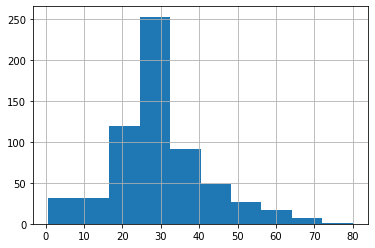

In [ ]:
df_train.age.hist()

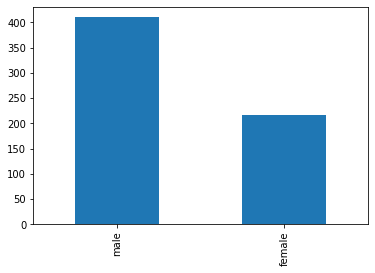

In [ ]:
df_train['sex'].value_counts().plot(kind='bar')

In [ ]:
pd.concat([y_train, df_train], axis=1).groupby('sex')['survived'].value_counts()

sex     survived
female  1           169
        0            48
male    0           336
        1            74
Name: survived, dtype: int64

In [ ]:
CATEGORICAL_COLS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLS:
  vocabulary = df_train[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32 ))

feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

In [ ]:
def make_input_function(data_df, label_df, num_epochs=1, shuffle=False, batch_size=32):
  def input_fn():
    # create tensorflow dataset
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))

    # shuffle if required
    if shuffle:
      ds = ds.shuffle(100)

    # divide into batches and epochs
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds

  return input_fn

train_input_fn = make_input_function(df_train, y_train, 10, True, 32)
eval_input_fn = make_input_function(df_eval, y_eval)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
result['accuracy']

0.75757575

In [ ]:
predictions = list(linear_est.predict(eval_input_fn))

record_index=7
print(df_eval.loc[record_index])
print("Survived?", y_eval.loc[record_index])
print("Prediction: ", predictions[record_index]['probabilities'][1])

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpak4ug_a0/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                            21
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 7, dtype: object
Survived? 0
Prediction:  0.08150854
